In [1]:


import os
os.system("pip install holidays")
import holidays

#календарь праздников Франция за 2019,2020
CF=holidays.FRA(years =[2019,2020])

#календарь праздников RF за 2019,2020
RF=holidays.RU(years =[2019,2020])
CF,RF

# Это подключение праздников для кучи стран

({datetime.date(2019, 1, 1): "Jour de l'an",
  datetime.date(2019, 5, 1): 'Fête du Travail',
  datetime.date(2019, 5, 8): 'Armistice 1945',
  datetime.date(2019, 7, 14): 'Fête nationale',
  datetime.date(2019, 11, 11): 'Armistice 1918',
  datetime.date(2019, 4, 22): 'Lundi de Pâques',
  datetime.date(2019, 6, 10): 'Lundi de Pentecôte',
  datetime.date(2019, 5, 30): 'Ascension',
  datetime.date(2019, 8, 15): 'Assomption',
  datetime.date(2019, 11, 1): 'Toussaint',
  datetime.date(2019, 12, 25): 'Noël',
  datetime.date(2020, 1, 1): "Jour de l'an",
  datetime.date(2020, 5, 1): 'Fête du Travail',
  datetime.date(2020, 5, 8): 'Armistice 1945',
  datetime.date(2020, 7, 14): 'Fête nationale',
  datetime.date(2020, 11, 11): 'Armistice 1918',
  datetime.date(2020, 4, 13): 'Lundi de Pâques',
  datetime.date(2020, 6, 1): 'Lundi de Pentecôte',
  datetime.date(2020, 5, 21): 'Ascension',
  datetime.date(2020, 8, 15): 'Assomption',
  datetime.date(2020, 11, 1): 'Toussaint',
  datetime.date(2020, 12, 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


## Данные для анализа

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv


Прочитаем ежеденевно обновляемые данные из ссылки и загрузим себе.

# Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках ) - ДЛЯ US ниже

In [3]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
23476,23477,05/10/2020,Wyoming,US,2020-05-11 02:32:30,662.0,7.0,0.0
23477,23478,05/10/2020,Xinjiang,Mainland China,2020-05-11 02:32:30,76.0,3.0,73.0
23478,23479,05/10/2020,Yukon,Canada,2020-05-11 02:32:30,11.0,0.0,0.0
23479,23480,05/10/2020,Yunnan,Mainland China,2020-05-11 02:32:30,185.0,2.0,183.0
23480,23481,05/10/2020,Zhejiang,Mainland China,2020-05-11 02:32:30,1268.0,1.0,1267.0


Выносим дату отдельным столбцом и делаем копии

In [5]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date


Группируем по странам (без провинций) и дате измерения

In [6]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [7]:
COVID.head(30)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              3.0     0.0        0.0
           US                    1.0     0.0        0.0
           Vietnam               2.0     0.0        0.0
2020-01-24 France                2.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      916.0    26.0       36.0
           Singapore             3.0     0.0        0.0

Нарисуем для КИтая

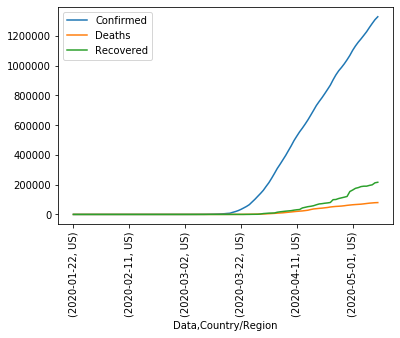

In [8]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Есть какие-то странные места в феврале

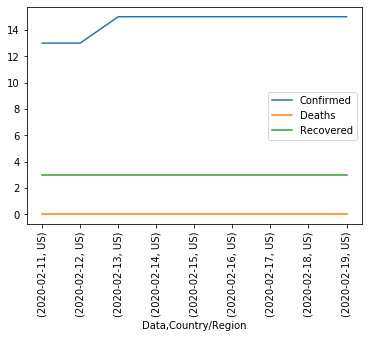

In [9]:
COVID.loc[((COVID.index.get_level_values( 'Country/Region')=='US') & (COVID.index.get_level_values( 'Data') > pd.to_datetime('2020-02-10'))& (COVID.index.get_level_values( 'Data') < pd.to_datetime('2020-02-20'))), ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Посмотрим на них в цифрах

In [10]:
COVID_.loc[( (COVID_[ 'Country/Region']=='US') & (COVID_['Data'] > pd.to_datetime('2020-02-11'))& (COVID_['Data'] < pd.to_datetime('2020-02-14'))), :].head(50)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Data
1323,1324,02/12/2020,"Chicago, IL",US,2020-02-09T19:03:03,2.0,0.0,2.0,2020-02-12
1324,1325,02/12/2020,"San Benito, CA",US,2020-02-03T03:53:02,2.0,0.0,0.0,2020-02-12
1325,1326,02/12/2020,"Santa Clara, CA",US,2020-02-03T00:43:02,2.0,0.0,0.0,2020-02-12
1334,1335,02/12/2020,"Boston, MA",US,2020-02-01T19:43:03,1.0,0.0,0.0,2020-02-12
1335,1336,02/12/2020,"Los Angeles, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0,2020-02-12
1336,1337,02/12/2020,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0,2020-02-12
1337,1338,02/12/2020,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0,2020-02-12
1338,1339,02/12/2020,"San Diego County, CA",US,2020-02-11T01:23:05,1.0,0.0,0.0,2020-02-12
1339,1340,02/12/2020,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0,2020-02-12
1340,1341,02/12/2020,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0,2020-02-12


Пока нет дополнительной информации не скажешь, что происходит (а это пояснение https://www.interfax.ru/world/695138 - стали включать клинический диагноз) - пожоже нужно разделить модель на до и после.

In [11]:
COVID.head(20)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0

Сделаем первые разности (производную)

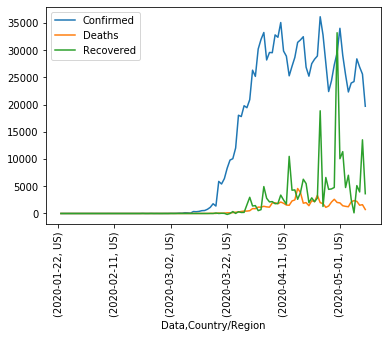

In [12]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Опять большой пик - нужен дополнительный анализ

Посмотрим только на выздоровление (так оптимистичней:))

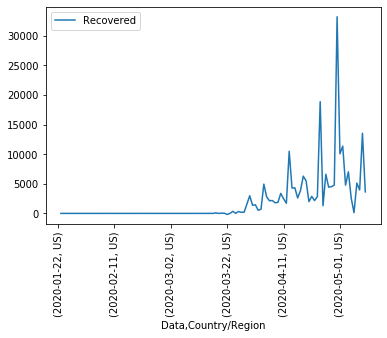

In [13]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Recovered']].diff(1).plot()
plt.xticks(label = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Recovered']].diff(1).values, rotation=90)

plt.show()

Странный ход данных сохранился - будем разбираться, что происходит


## Построим признаки

1) Первая разность (производная ряда) - разница с(t)-c(t-1) по всем t 

In [14]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

2) Сами значения элементов ряда по времени

In [15]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Confirmed','Deaths','Recovered']].values 

In [16]:
X1.shape

(110, 3)

In [17]:
X2.shape

(110, 3)

3) Добавим признаков по календарю
   

In [18]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='US'].index.get_level_values( 'Data')

In [19]:
X3

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31,
       ...
       2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, 2020-05-05, 2020-05-06,
       2020-05-07, 2020-05-08, 2020-05-09, 2020-05-10],
      dtype='object', name='Data', length=110)

3.1) - день недели по счету

3.2) - день от начала статистики в текущей таблице (для Китая - 1-й день карантина(возможно), для других стран следует посмотреть на первый не 0-й экземпляр по 'Confirmed') - строим как "текущий день года" - "первый день от начала отсчета данных по номеру в году"

In [20]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [21]:
X3_2

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
           dtype='int64', name='Data', length=110)

Собирем все в кучу

In [22]:
XX = np.concatenate([X1,X2], axis= 1)

In [23]:
XX = np.concatenate([XX,np.array(X3_1).reshape((X1.shape[0],1))], axis= 1)

In [24]:
XX = np.concatenate([XX,np.array(X3_2).reshape((X1.shape[0],1))], axis= 1)

In [25]:
XX.shape

(110, 8)

Таблица признаков для Китая

In [26]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [27]:
COVID_Data.head()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-01-22,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2020-01-23,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
2020-01-24,1.0,0.0,0.0,2.0,0.0,0.0,4.0,2.0
2020-01-25,0.0,0.0,0.0,2.0,0.0,0.0,5.0,3.0
2020-01-26,3.0,0.0,0.0,5.0,0.0,0.0,6.0,4.0


Сбросим 22 дня в отдельный ряд. там считали по другой схеме.

In [28]:
COVID_Data12 = COVID_Data.iloc[:23,:].copy()
COVID_Data = COVID_Data.iloc[23:,:]

In [29]:
COVID_Data.head()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-02-14,0.0,0.0,0.0,15.0,0.0,3.0,4.0,23.0
2020-02-15,0.0,0.0,0.0,15.0,0.0,3.0,5.0,24.0
2020-02-16,0.0,0.0,0.0,15.0,0.0,3.0,6.0,25.0
2020-02-17,0.0,0.0,0.0,15.0,0.0,3.0,0.0,26.0
2020-02-18,0.0,0.0,0.0,15.0,0.0,3.0,1.0,27.0


Сделаем данные для модели:

необходимо определить как далеко будем смотреть назад по ряду от текущего дня - это параметр р - глубина истории

необходимо определить как далеко будем смотреть вперед (предсказывать) - это горизонт прогноза h

In [30]:
p = 3 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

Строим выходную часть данных:
 
 предсказываем значения заболеваемости (т.е. признак COVID_Dat.iloc[:,3])
 
 сдвигаем точку предсказания на длину истории р (т.к. не можем предсказывать имея меньше чем р данных для анализа) и ставим первой предсказываемой точкой точку p+h , h - горизонт предсказания

In [31]:
y = COVID_Data.iloc[h+p:,0]
y

Data
2020-02-18        0.0
2020-02-19        0.0
2020-02-20        0.0
2020-02-21       20.0
2020-02-22        0.0
               ...   
2020-05-06    24252.0
2020-05-07    28420.0
2020-05-08    26906.0
2020-05-09    25621.0
2020-05-10    19710.0
Name: 0, Length: 83, dtype: float64

Строим данные для входной части модели:

наши р дней истории по всем признакам  начиная от 0-го дня используем блоками  XX[i:i+p,:] для i = 0,64

последний предсказываемый день будет 75-й (5.04.2020), т.е. данные для предсказания кончаются в 74-й день (4.04.2020) (сегодня 9.04 - последний день 8.04 - 78-й день)

векторизируем весь блок данных истории в вектор длины 8*р и дописываем в примеры для обучения  X

In [32]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

Приводим все к одному виду для обработки в модели

In [33]:
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,8*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))

In [34]:
X.shape

(83, 24)

In [35]:
y.shape

(83, 1)

Можно строить модель

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()
# и еще одну
model_gb = GradientBoostingRegressor(n_estimators=100)

In [37]:
model_lb.fit(x_train,y_train)
model_gb.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

y_predg = model_gb.predict(x_test)
y_predg_t = model_gb.predict(x_train)

In [39]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

error_ =np.mean(np.abs(y_predg-y_test))
print(error_)

67374.90110101129
4842.2448593325835


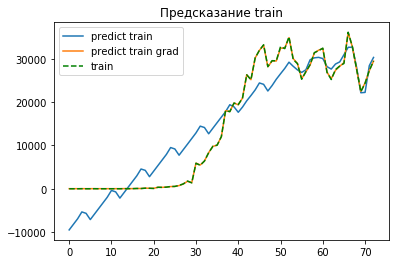

In [40]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_predg_t, label='predict train grad')
plt.plot(y_train,'--g', label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()

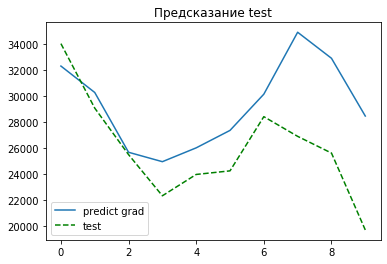

In [41]:
#plt.plot(y_pred, label='predict')
plt.plot(y_predg, label='predict grad')
plt.plot(y_test, '--g',label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

Вообще получилось хорошо :) - довольно точно

In [42]:
error_p =np.mean(np.abs(y_test.reshape((10))-y_predg.reshape((10)))/y_test.reshape((10)))*100

print('error in MAPE :', error_p, '%')

error in MAPE : 15.174817162226503 %


In [43]:
y_test.reshape((10))-y_predg.reshape((10))

array([ 1725.29926469, -1202.28929598,  -180.50077205, -2622.72203119,
       -2045.5042773 , -3111.85690776, -1729.62870067, -8006.55728939,
       -7289.29462103, -8758.60209134])

## Box-Cox преобразование

In [44]:
import scipy.stats as scs

In [45]:
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [46]:
t=range(1000)
d_t =1020+ np.array(t) + np.sin(np.array(t)/3.14)*np.array(t)*0.3+20*np.random.random(1000)

In [47]:
d_bc, lmbda = scs.boxcox(d_t[10:]) # прибавляем единицу, так как в исходном ряде есть нули
lmbda

-0.11014374771595646

In [48]:
d_bc1, lmbda1 = scs.boxcox(d_bc) # прибавляем единицу, так как в исходном ряде есть нули
lmbda1

0.6289832025198162

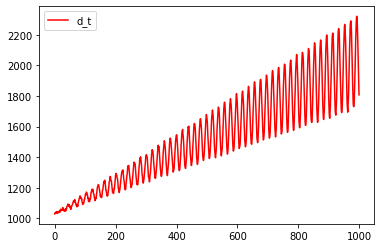

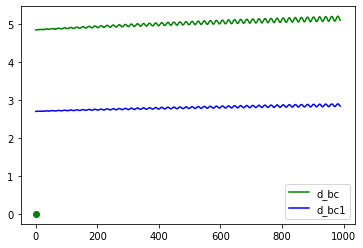

In [49]:
plt.plot(d_t,'r',label='d_t')
plt.legend()
plt.show()
plt.plot(d_bc,'g',label='d_bc')
plt.plot(d_bc1,'b',label='d_bc1')
plt.plot(0,0,'og')
plt.legend()
plt.show()

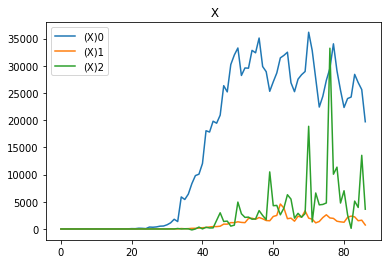

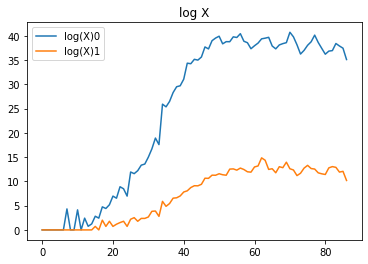

In [50]:

X_log0, lmbda0 = scs.boxcox(XX[23:,0]+1)
X_log1, lmbda1 = scs.boxcox(XX[23:,1]+1)
#X_log2, lmbda2 = scs.boxcox(XX[23:,2]+1)

plt.plot(XX[23:,0], label='(X)0')
plt.plot(XX[23:,1], label='(X)1')
plt.plot(XX[23:,2], label='(X)2')
plt.legend()
plt.title(' X')
plt.show()

plt.plot(X_log0[:], label='log(X)0')
plt.plot(X_log1[:], label='log(X)1')
#plt.plot(X_log2[:], label='log(X)2')
plt.legend()
plt.title('log X')
plt.show()

Текущее число больных

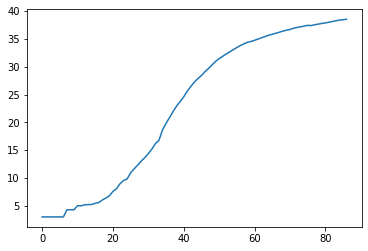

In [51]:
X_dif=XX[23:,3]-XX[23:,4]-XX[23:,5]
X_dif_log, lmbda_dif = scs.boxcox(X_dif+1)
plt.plot(X_dif_log)
plt.show()

Соберем из Логарифмированных признаков новую модель

In [52]:
X_log = np.concatenate([X_log0.reshape((X_log0.shape[0],1)),(X_log1).reshape((X_log1.shape[0],1))], axis= 1)
#X_log = np.concatenate([X_log,(X_log2).reshape((X_log2.shape[0],1))], axis= 1)
X_log = np.concatenate([X_log,(X_dif_log).reshape((X_dif_log.shape[0],1))], axis= 1)

y = X_log[h+p:,0].reshape((X_log0.shape[0]-h-p,1))

X_log_all =[]
for i in range(len(y)):
    xx = X_log[i:i+p,:]
    X_log_all.append(xx.reshape(X_log.shape[1]*p))

    N=-10
X_log_all=np.array(X_log_all)
x_trainl,y_train,x_testl,y_test=X_log_all[:N,:],y[:N,:],X_log_all[N:,:],y[N:,:]

x_trainl.shape

(73, 9)

In [53]:
y_train.shape

(73, 1)

In [54]:
model_lb.fit(x_trainl,y_train)
model_gb.fit(x_trainl,y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_pred = model_lb.predict(x_testl)
y_pred_t = model_lb.predict(x_trainl)

y_predg = model_gb.predict(x_testl)
y_predg_t = model_gb.predict(x_trainl)

In [56]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

error_ =np.mean(np.abs(y_predg-y_test))
print(error_)

1.6040471836974164
1.4674391653297556


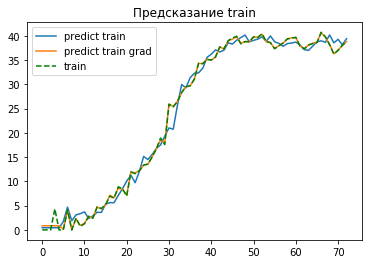

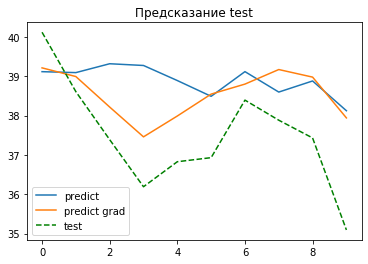

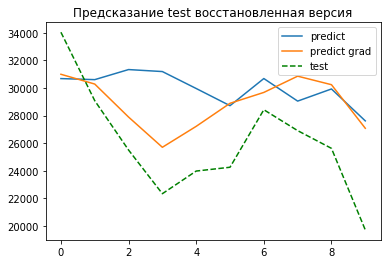

In [57]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_predg_t, label='predict train grad')
plt.plot(y_train,'--g', label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()
plt.plot(y_pred, label='predict')
plt.plot(y_predg, label='predict grad')
plt.plot(y_test, '--g',label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

plt.plot(invboxcox(y_pred,lmbda0), label='predict')
plt.plot(invboxcox(y_predg,lmbda0), label='predict grad')
plt.plot(invboxcox(y_test,lmbda0), '--g',label='test')
plt.legend()
plt.title('Предсказание test восстановленная версия')
plt.show()

In [58]:
error_p =np.mean(np.abs(invboxcox(y_predg,lmbda0)-invboxcox(y_test,lmbda0))/invboxcox(y_test,lmbda0))*100
print('MAPE :' , error_p)

MAPE : 17.5681204428482


In [59]:
error_p =np.mean(np.abs(invboxcox(y_test[1:],lmbda0)-invboxcox(y_test[:-1],lmbda0))/invboxcox(y_test[:-1],lmbda0))*100
print('MAPE :' , error_p)

MAPE : 10.904551176150257


In [60]:
error_p =np.mean(np.abs(invboxcox(y_test,lmbda0)-np.mean(invboxcox(y_test,lmbda0)))/invboxcox(y_test,lmbda0))*100
print('MAPE :' , error_p)

MAPE : 11.328534986171174


In [61]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [62]:
#X_x = X_log_all[:,0]

X_x = X_dif_log[:]

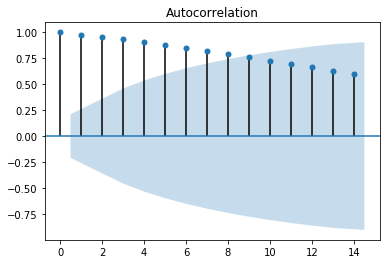

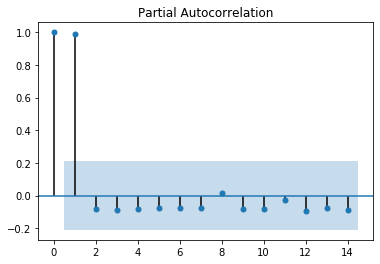

In [63]:
sm.graphics.tsa.plot_acf(X_x, lags=14)
plt.show()
sm.graphics.tsa.plot_pacf(X_x, lags=14)
plt.show()

смотримм на PACF - 1-е значение имеет смысл - d=1

смотрим на acf - РАВНОМЕРНО ПАДАЕТ, ИСТОРИЯ НА ГЛУБИНУ НЕ БОЛЕЕ 4 ДНЕЙ - Р<= 4

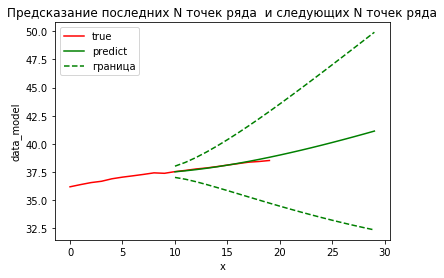

In [64]:
N=10    # число точек для теста
# строим модель

model = ARIMA(X_x[:-N], order=(1, 1,2))
model_fit = model.fit(disp=False)
# делаем оценку старых значений
y_p = model_fit.predict(len(X_x[:-N]), len(X_x[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)
plt.plot(X_x[-10-N:],'r',label ='true')

plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()